In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
fashion_data = fashion_mnist.load_data()
len(fashion_data)

2

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_data

In [23]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [24]:
from tensorflow.keras.utils import to_categorical
import random

In [25]:
y_categorical_train = to_categorical(y_train)
y_categorical_test = to_categorical(y_test)

In [26]:
print(X_train.shape, y_train.shape)

(60000, 28, 28, 1) (60000,)


In [27]:
print(X_test.shape, y_test.shape)

(10000, 28, 28, 1) (10000,)


In [28]:
random_idx = random.randint(0, len(X_train) - 1)

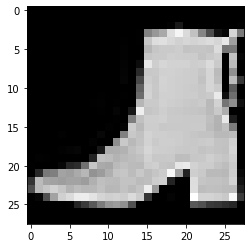

In [29]:
random_image = X_train[random_idx]
plt.imshow(random_image, cmap= 'gray')

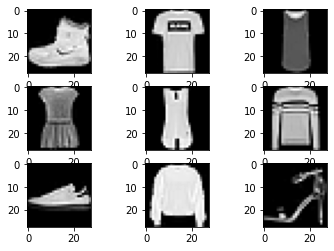

In [30]:
# first 9 pics
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

plt.show()

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.layers import MaxPool2D

In [32]:
# data, width, height, color channel
X_train = X_train.reshape(60000, 28,  28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [33]:
model = Sequential()

model.add(Conv2D(filters= 32, kernel_size= (3, 3), input_shape= (28, 28, 1), activation= 'relu'))
model.add(MaxPool2D(pool_size= (2, 2), strides= (1, 1)))

model.add(Flatten())

model.add(Dense(64, activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))

In [34]:
model.compile(loss= 'categorical_crossentropy', optimizer= 'adam', 
             metrics= ['accuracy'])

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                1280064   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 1,281,034
Trainable params: 1,281,034
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_train, y_categorical_train, epochs= 5, validation_data= (X_test, y_categorical_test))

Epoch 1/5
  12/1875 [..............................] - ETA: 17s - loss: 2.2987 - accuracy: 0.1328

2022-08-01 00:22:21.147070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1872/1875 [============================>.] - ETA: 0s - loss: 0.7759 - accuracy: 0.7197

2022-08-01 00:22:37.050493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 18s 9ms/step - loss: 0.7753 - accuracy: 0.7199 - val_loss: 0.5738 - val_accuracy: 0.7862
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5048 - accuracy: 0.8153 - val_loss: 0.5177 - val_accuracy: 0.8071
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4467 - accuracy: 0.8390 - val_loss: 0.4643 - val_accuracy: 0.8328
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4104 - accuracy: 0.8522 - val_loss: 0.4534 - val_accuracy: 0.8343
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3844 - accuracy: 0.8618 - val_loss: 0.4075 - val_accuracy: 0.8558


In [37]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.775344,0.719917,0.573755,0.7862
1,0.504753,0.815333,0.517745,0.8071
2,0.446702,0.838983,0.464347,0.8328
3,0.410428,0.852183,0.453419,0.8343
4,0.384399,0.861783,0.407494,0.8558


<AxesSubplot:>

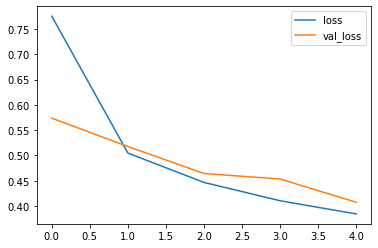

In [38]:
metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

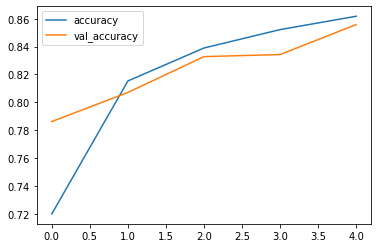

In [39]:
metrics[['accuracy', 'val_accuracy']].plot()

# Prediction

- 0: T-shirt/top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot

In [40]:
random_idx = random.randint(0, len(X_test) - 1)
image = X_test[random_idx]

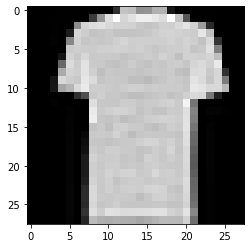

In [41]:
plt.imshow(image, cmap= 'gray')

In [44]:
model.predict_classes(image.reshape(1,28,28,1))

array([0])

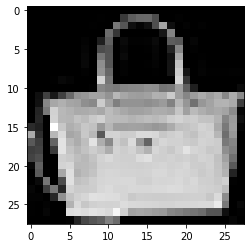

In [51]:
random_idx = random.randint(0, len(X_test) - 1)
image = X_test[random_idx]
plt.imshow(image, cmap= 'gray')

In [52]:
model.predict_classes(image.reshape(1,28,28,1))

array([8])

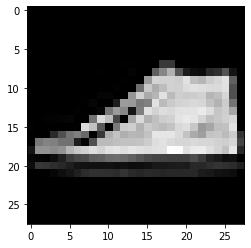

In [47]:
random_idx = random.randint(0, len(X_test) - 1)
image = X_test[random_idx]
plt.imshow(image, cmap= 'gray')

In [48]:
model.predict_classes(image.reshape(1,28,28,1))

array([7])

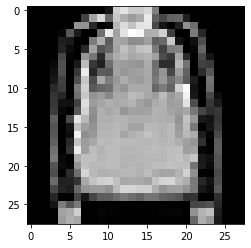

In [49]:
random_idx = random.randint(0, len(X_test) - 1)
image = X_test[random_idx]
plt.imshow(image, cmap= 'gray')

In [50]:
model.predict_classes(image.reshape(1,28,28,1))

array([4])